In [2]:
import sys
sys.path.append('investigation_functions')
from investigation_functions import data_process_funcs as dpf
from investigation_functions import ml_funcs as mlf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.colors as mcolors

In [3]:
df_4q_H = dpf.get_expanded_df('Hardware',4,dir_ = '../',processed = False, updated_results=True)
df_4q_H = df_4q_H.drop(['0000'],axis =1)
df4qH_t = df_4q_H[df_4q_H['backend']=='torino']
df4qH_b = df_4q_H[df_4q_H['backend']=='brisbane']
df4qH_m = df_4q_H[df_4q_H['backend']=='marrakesh']
df4qH_f = df_4q_H[df_4q_H['backend']=='fez']

In [4]:
mean_t = dpf.find_mean_cols(df4qH_t)
print(mean_t)
mean_b = dpf.find_mean_cols(df4qH_b)
mean_f = dpf.find_mean_cols(df4qH_f)
mean_m = dpf.find_mean_cols(df4qH_m)

0001    392.549708
0010    224.543860
0011     65.116959
0100     62.672515
0101     26.561404
0110     12.473684
0111     30.690058
1000     30.146199
1001     16.701754
1010      3.163743
1011      2.520468
1100      3.263158
1101      2.134503
1110      1.514620
1111      3.152047
dtype: float64


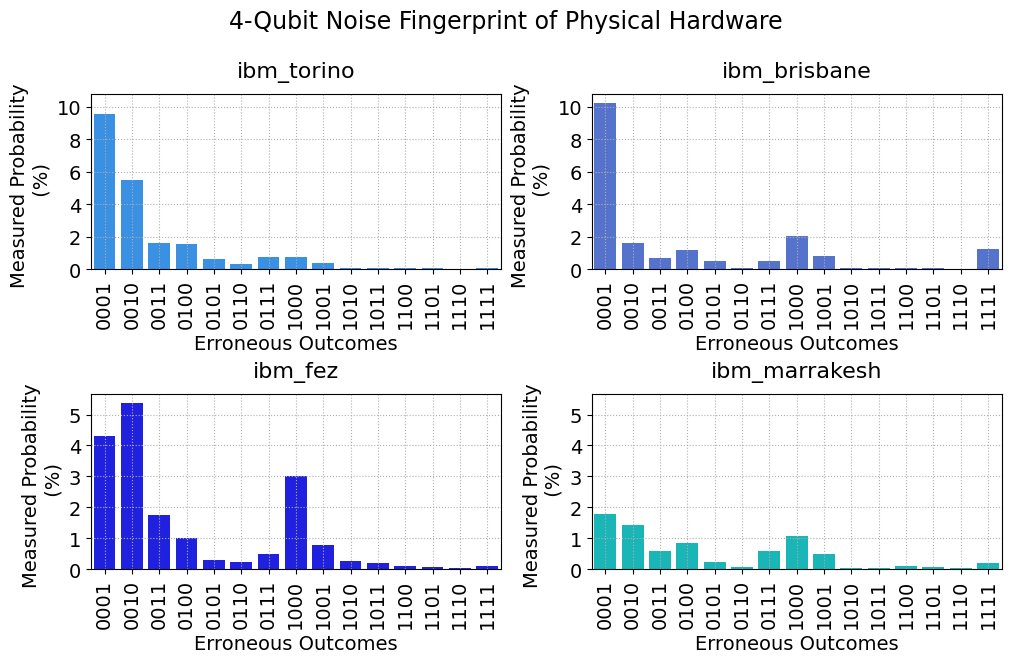

In [5]:


fig = plt.figure(figsize=(10,6), layout = 'constrained')

plt.suptitle(
    '4-Qubit Noise Fingerprint of Physical Hardware',fontsize = 17,
    y = 1.08
)

n_rows = 2
n_cols = 2
x_labels = 'Erroneous Outcomes'
y_labels = 'Measured Probability \n (%)'
x_label_size = 14
y_label_size = 14
subtitle_size = 16
subtitle_y = 1.05
x_tick_rot = 90
# grid_bool = True

plt.subplot(n_rows,n_cols,1,ymargin =1)
ax1 = sns.barplot(
    data =mean_t*100/4096, label = 'ibm_torino',
    color=mcolors.CSS4_COLORS['dodgerblue']
)
plt.grid(linestyle='dotted')
plt.xticks(rotation = x_tick_rot,fontsize = x_label_size)
plt.yticks(fontsize = y_label_size)
ax1.set_ylabel(y_labels ,fontsize = y_label_size)
ax1.set_xlabel(x_labels ,fontsize = x_label_size)
# ax1.get_xticks()
ax1.set_title(
    'ibm_torino',fontsize = subtitle_size,y=subtitle_y)

plt.subplot(n_rows,n_cols,2,sharey = ax1, sharex = ax1)
ax2 = sns.barplot(
    data =mean_b*100/4096, label = 'ibm_brisbane',
    color=mcolors.CSS4_COLORS['royalblue']#['lightseagreen']
)
plt.grid(linestyle='dotted')
plt.xticks(rotation = x_tick_rot,fontsize = x_label_size)
plt.yticks(fontsize = y_label_size)
ax2.set_ylabel(y_labels ,fontsize = y_label_size)
ax2.set_xlabel(x_labels ,fontsize = x_label_size)
ax2.set_title(
    'ibm_brisbane',fontsize = subtitle_size, y=subtitle_y)

plt.subplot(n_rows,n_cols,3,sharex = ax1)
ax3 = sns.barplot(
    data =mean_f*100/4096, label = 'ibm_fez',
    color=mcolors.CSS4_COLORS['blue']
)
plt.grid(linestyle='dotted')
plt.xticks(rotation = x_tick_rot,fontsize = x_label_size)
plt.yticks(fontsize = y_label_size)
ax3.set_ylabel(y_labels ,fontsize = y_label_size)
ax3.set_xlabel(x_labels ,fontsize = x_label_size)
ax3.set_title(
    'ibm_fez',fontsize = subtitle_size, y=subtitle_y)

plt.subplot(n_rows,n_cols,4,sharey = ax3,sharex = ax1)
ax4 = sns.barplot(
    data =mean_m*100/4096, label = 'ibm_marrakesh',
    color=mcolors.CSS4_COLORS['darkturquoise']
)
# plt.grid(grid_bool)
plt.grid( linestyle='dotted')
plt.xticks(rotation = x_tick_rot,fontsize = x_label_size)
plt.yticks(fontsize = y_label_size)
ax4.set_ylabel(y_labels ,fontsize = y_label_size)
ax4.set_xlabel(x_labels ,fontsize = x_label_size)
ax4.set_title(
    'ibm_marrakesh',fontsize = subtitle_size, y=subtitle_y)

plt.show()

# plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0.)

In [12]:
def plot_fingerprints(
    dfs,
    title_,
    rows_ylim = [10,5],
    backends = ['brisbane','torino','fez','marrakesh'],
    x_labels = 'Erroneous Outcomes',
    y_labels = 'Measured Probability \n (%)',
    n_rows = 2,
    n_cols = 2,
    x_label_size = 14,
    y_label_size = 14,
    subtitle_size = 16,
    subtitle_y = 1.05,
    x_tick_rot = 90,
    sharey_by_row = True
    ):
    colours = [
        mcolors.CSS4_COLORS['darkturquoise'],
        mcolors.CSS4_COLORS['dodgerblue'],
        mcolors.CSS4_COLORS['blue'],
        mcolors.CSS4_COLORS['royalblue']
    ]
    fig = plt.figure(figsize=(10,6), layout = 'constrained')

    plt.suptitle(
        title_,fontsize = 17,
        y = 1.08
    )
    axs =[]
    for i in range(len(dfs)):
        axs_to_share = None
        if sharey_by_row:
            if (i+1)%n_cols==0:
                axs_to_share = axs[i-1]

        axs.append(plt.subplot(n_rows,n_cols,i+1,ymargin =1,sharey=axs_to_share))
        axs[i] =sns.barplot(
            data =dfs[i], label = backends[i],
            color=colours[i%n_cols]
        )
        plt.grid(linestyle='dotted')
        plt.xticks(rotation = x_tick_rot,fontsize = x_label_size)
        plt.yticks(fontsize = y_label_size)
        axs[i].set_ylabel(y_labels ,fontsize = y_label_size)
        axs[i].set_xlabel(x_labels ,fontsize = x_label_size)
        # ax1.get_xticks()
        axs[i].set_title(
            backends[i],fontsize = subtitle_size,y=subtitle_y)
        # axs[i].set_ylim(())

    plt.show()
def __drop_0th(df,nr_qubits):
    col_name = np.strings.multiply('0',nr_qubits)
    df_no0 =df.drop(str(col_name),axis=1)
    return df_no0

def get_err_mean_percents(
        df_to_sort,
        nr_qubits,
        backends=['brisbane','torino','fez','marrakesh']
    ):
    # print(df_to_sort.info())
    df_to_sort = __drop_0th(df_to_sort,nr_qubits)
    # print(df_to_sort.info())
    # dfs_split =[]
    means_percent =[]
    for backend in backends:
        df_b =df_to_sort[df_to_sort['backend']==backend]
        means_percent.append(dpf.find_mean_cols(df_b)*100/4096)
        # dfs_split.append(df_b)

    return means_percent

def get_means_above(means,above_val):
    means_above =[]
    for mean in means:
        high_mean =mean[mean>=0.5]
        means_above.append(high_mean)
        # print(high_mean)
    return means_above


## By backend c111

### 4q

In [7]:
means = [mean_b,mean_t,mean_f,mean_m]
means_percent =[]
for i in range(len(means)):
    means_percent.append(means[i]*100/4096)

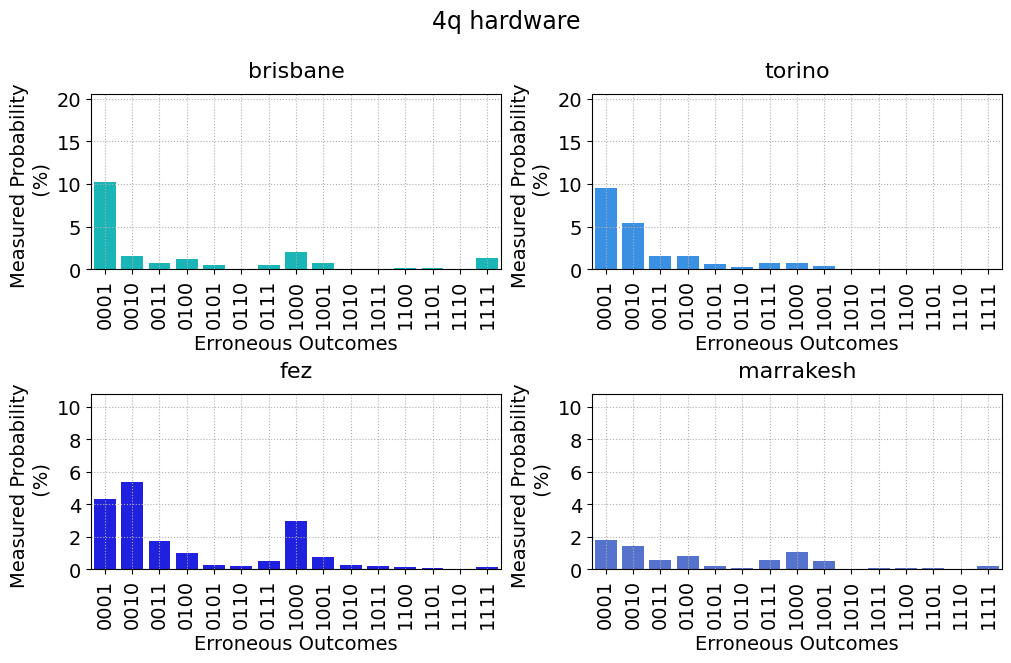

In [8]:
plot_fingerprints(
    means_percent,
    "4q hardware"
)

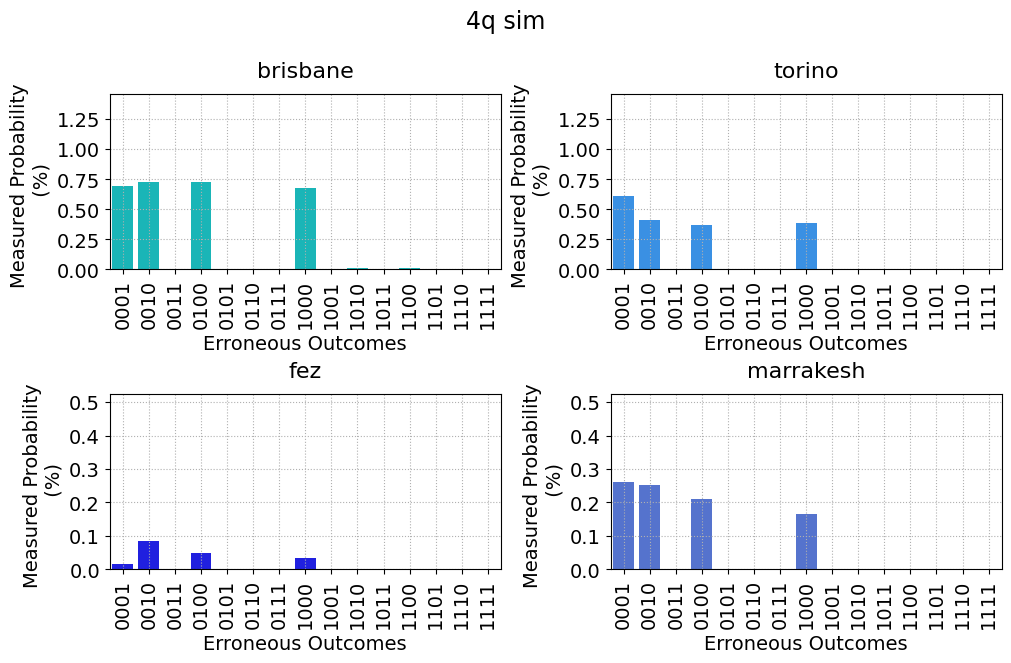

In [9]:
exp_type = 'Simulation'
n_qubits = 4
df_4q_S = dpf.get_expanded_df(
    exp_type,n_qubits,dir_ = '../',processed = False, updated_results=True)
# col_name = np.strings.multiply('0',n_qubits)
# df_8qH_no0 =df_8q_H.drop(str(col_name),axis=1)
means_4qS = get_err_mean_percents(df_4q_S,n_qubits)

plot_fingerprints(
    means_4qS,
    "4q sim",
)

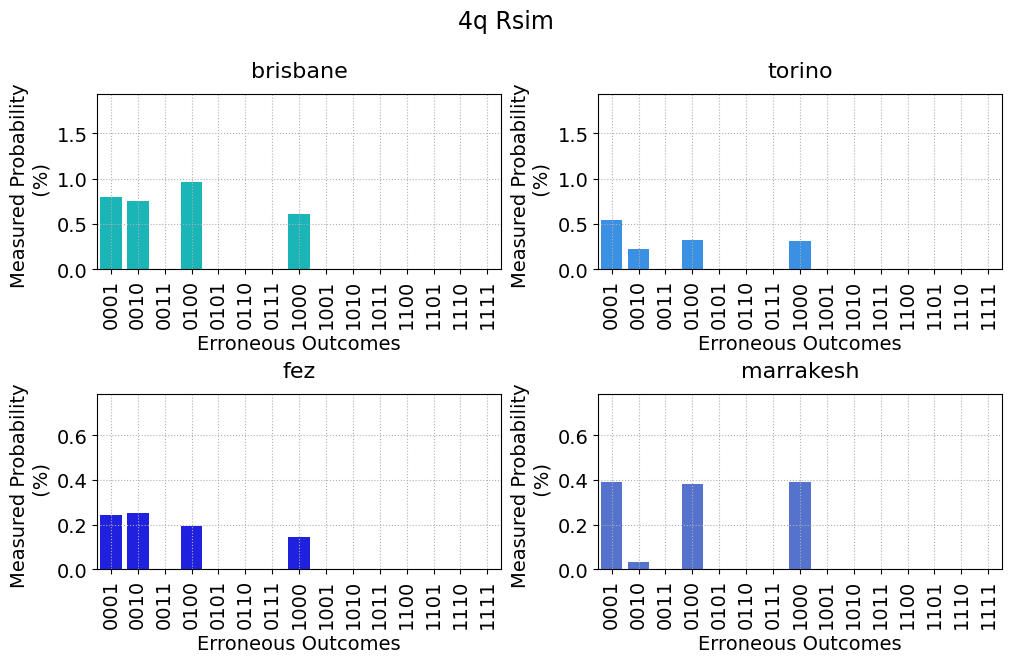

In [10]:
exp_type = 'Refreshed_Simulation'
n_qubits = 4
df_4q_R = dpf.get_expanded_df(
    exp_type,n_qubits,dir_ = '../',processed = False, updated_results=True)
# col_name = np.strings.multiply('0',n_qubits)
# df_8qH_no0 =df_8q_H.drop(str(col_name),axis=1)
means_4qR = get_err_mean_percents(df_4q_R,n_qubits)

plot_fingerprints(
    means_4qR,
    "4q Rsim",
)

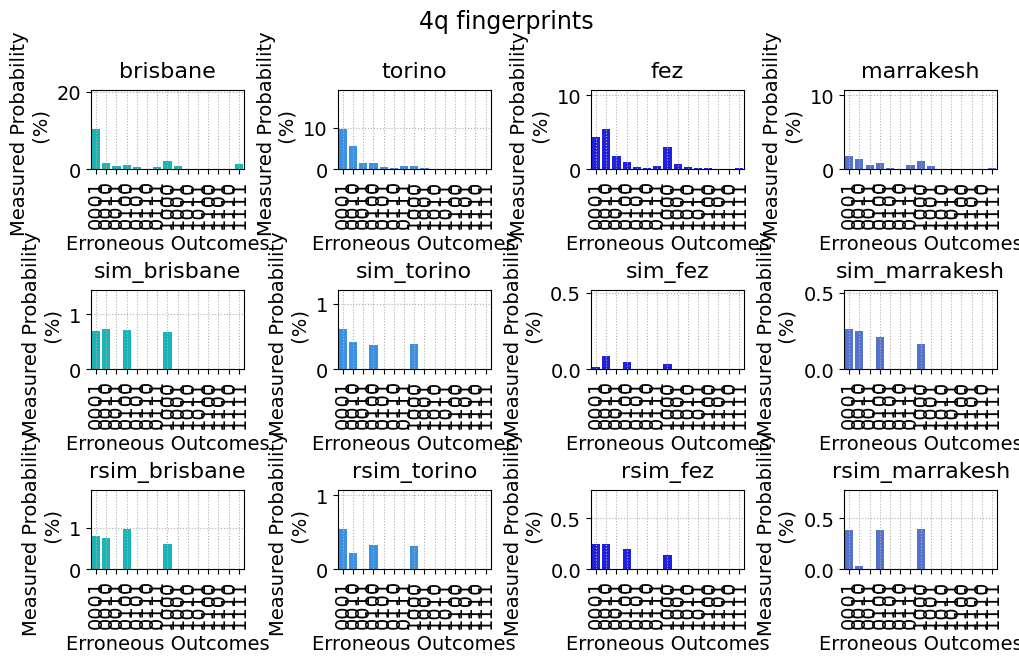

In [13]:
plot_fingerprints(
    means_percent + means_4qS + means_4qR,
    "4q fingerprints",
    backends = [
        'brisbane','torino','fez','marrakesh',
        'sim_brisbane','sim_torino','sim_fez','sim_marrakesh',
        'rsim_brisbane','rsim_torino','rsim_fez','rsim_marrakesh'
    ],
    n_cols=4,
    n_rows=3
)

### 8q

c:\Users\RAMEE\Desktop\VS\Python_Environments\env1\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


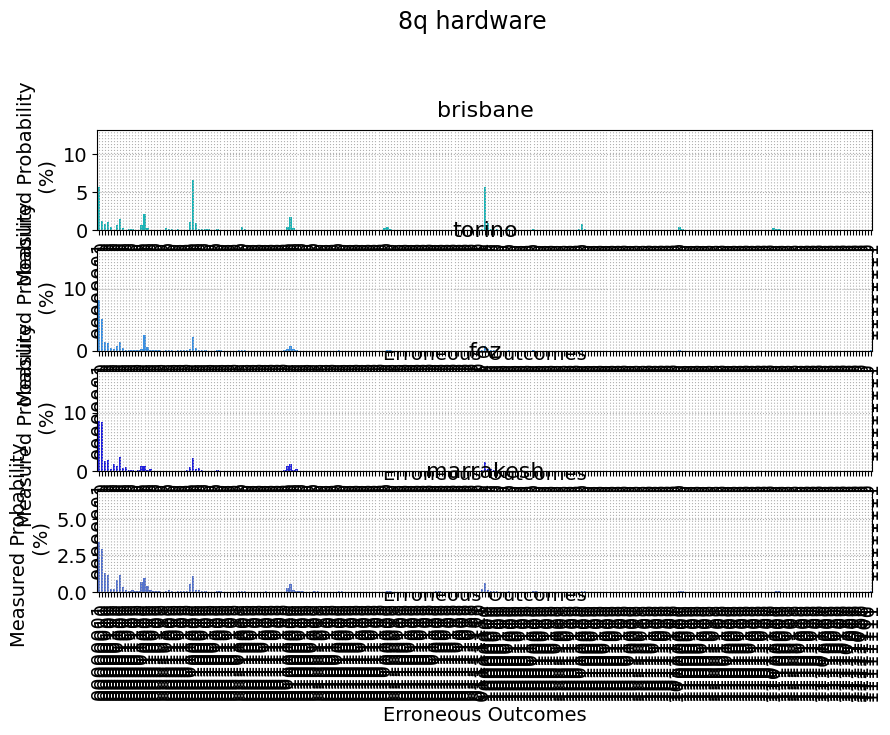

In [13]:
exp_type = 'Hardware'
n_qubits = 8
df_8q_H = dpf.get_expanded_df(
    exp_type,n_qubits,dir_ = '../',processed = False, updated_results=True)
# col_name = np.strings.multiply('0',n_qubits)
# df_8qH_no0 =df_8q_H.drop(str(col_name),axis=1)
means_8qH = get_err_mean_percents(df_8q_H,n_qubits)

plot_fingerprints(
    means_8qH,
    "8q hardware",
    n_rows = 4,
    n_cols =1,
    sharey_by_row=False
)

In [14]:
means_above_p5 =[]
for mean in means_8qH:
    high_mean =mean[mean>=0.5]
    means_above_p5.append(high_mean)
    # print(high_mean)


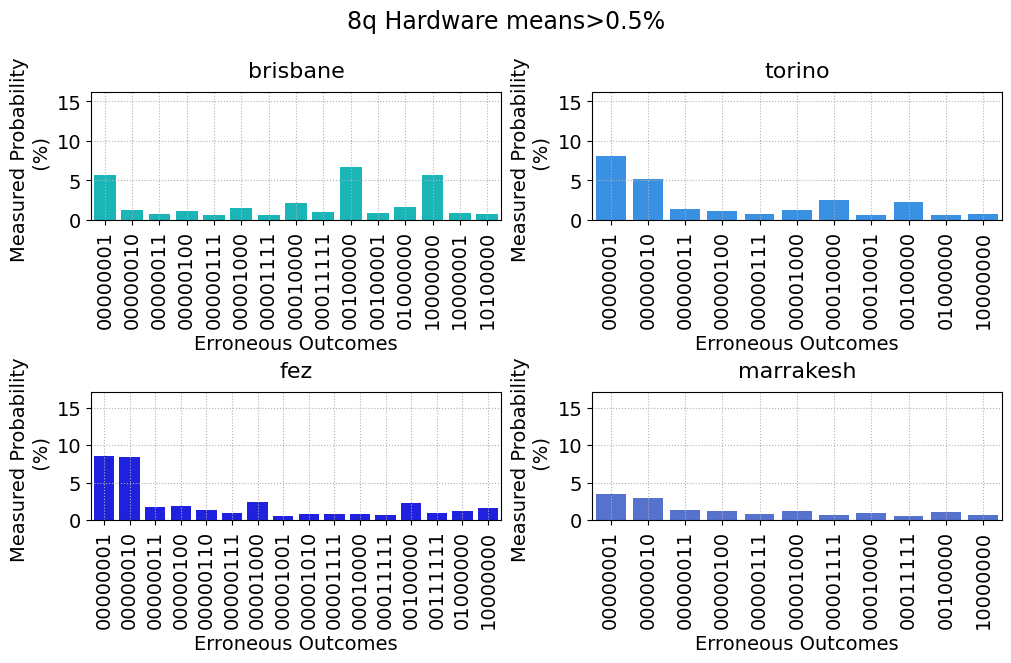

In [15]:
plot_fingerprints(
    means_above_p5,
    "8q Hardware means>0.5%"
)

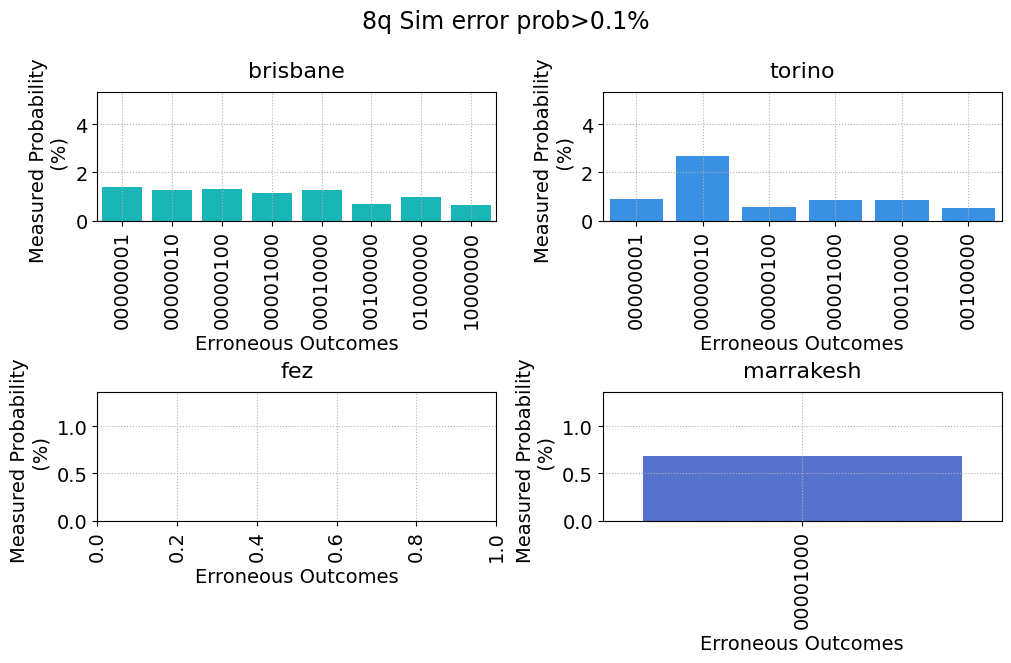

In [16]:
exp_type = 'Simulation'
n_qubits = 8
min_percent = 0.1
df_8q_S = dpf.get_expanded_df(
    exp_type,n_qubits,dir_ = '../',processed = False, updated_results=True)
means_8qS = get_err_mean_percents(df_8q_S,n_qubits)

plot_fingerprints(
    get_means_above(means_8qS,min_percent),
    "8q Sim error prob>0.1%",
)

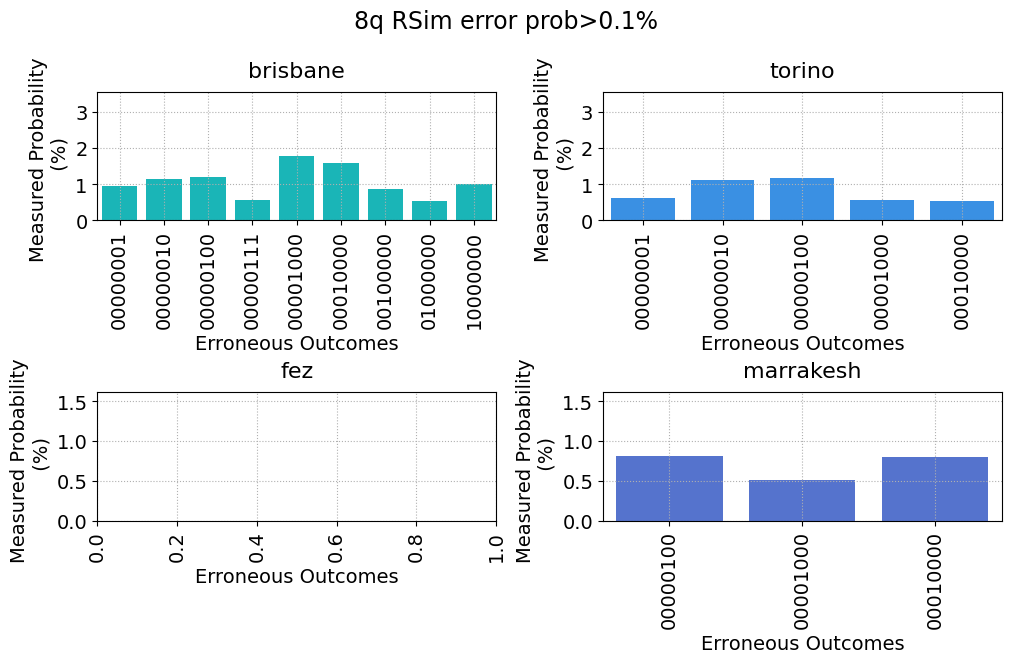

In [17]:
exp_type = 'Refreshed_Simulation'
n_qubits = 8
min_percent = 0.1
df_8q_R = dpf.get_expanded_df(
    exp_type,n_qubits,dir_ = '../',processed = False, updated_results=True)
means_8qR = get_err_mean_percents(df_8q_R,n_qubits)

plot_fingerprints(
    get_means_above(means_8qR,min_percent),
    "8q RSim error prob>0.1%",
)

### 16q

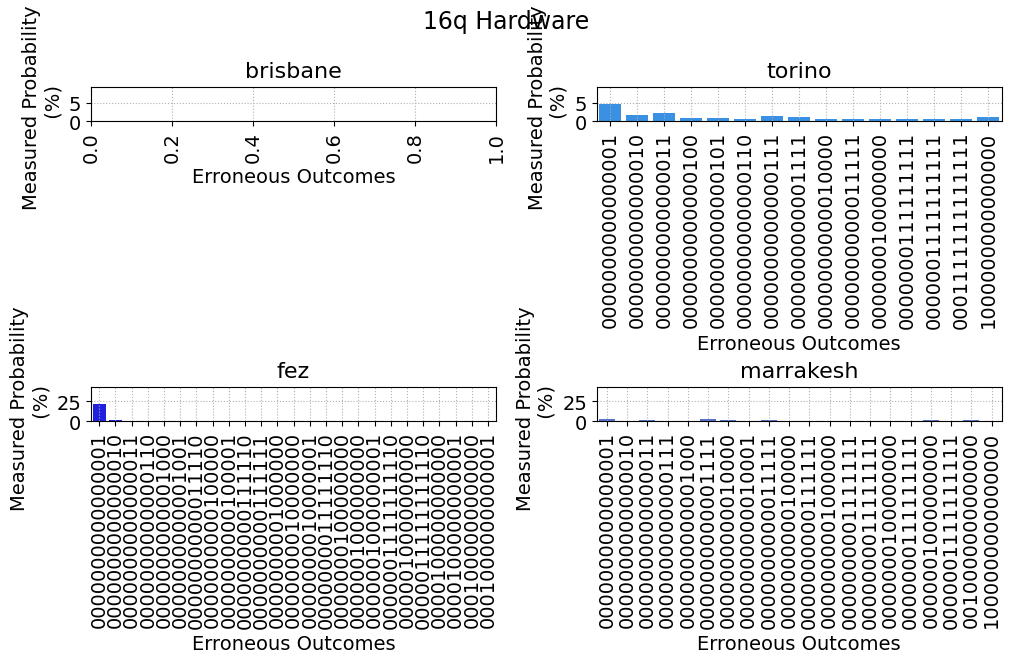

In [18]:
exp_type = 'Hardware'
n_qubits = 16
min_percent = 0.5
df_16q_H = dpf.get_expanded_df(
    exp_type,n_qubits,dir_ = '../',processed = False, updated_results=True)
means_16qH = get_err_mean_percents(df_16q_H,n_qubits)

plot_fingerprints(
    get_means_above(means_16qH,min_percent),
    "16q Hardware"
)


c:\Users\RAMEE\Desktop\VS\Python_Environments\env1\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


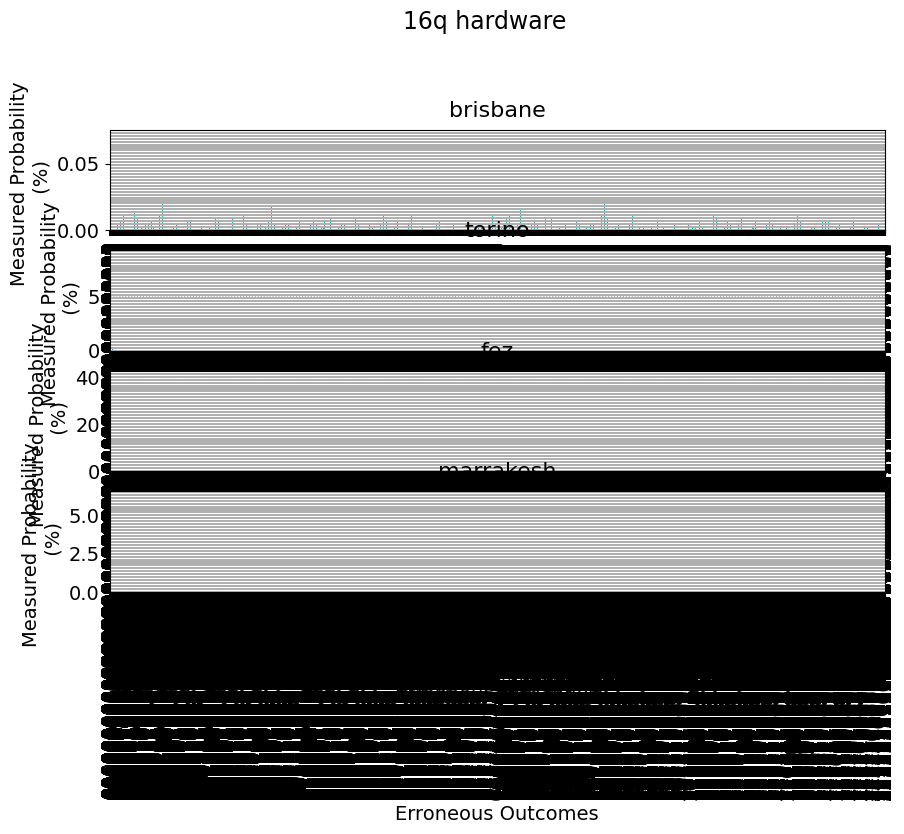

In [19]:

plot_fingerprints(
    means_16qH,
    "16q hardware",
    n_rows = 4,
    n_cols =1,
    sharey_by_row=False
)

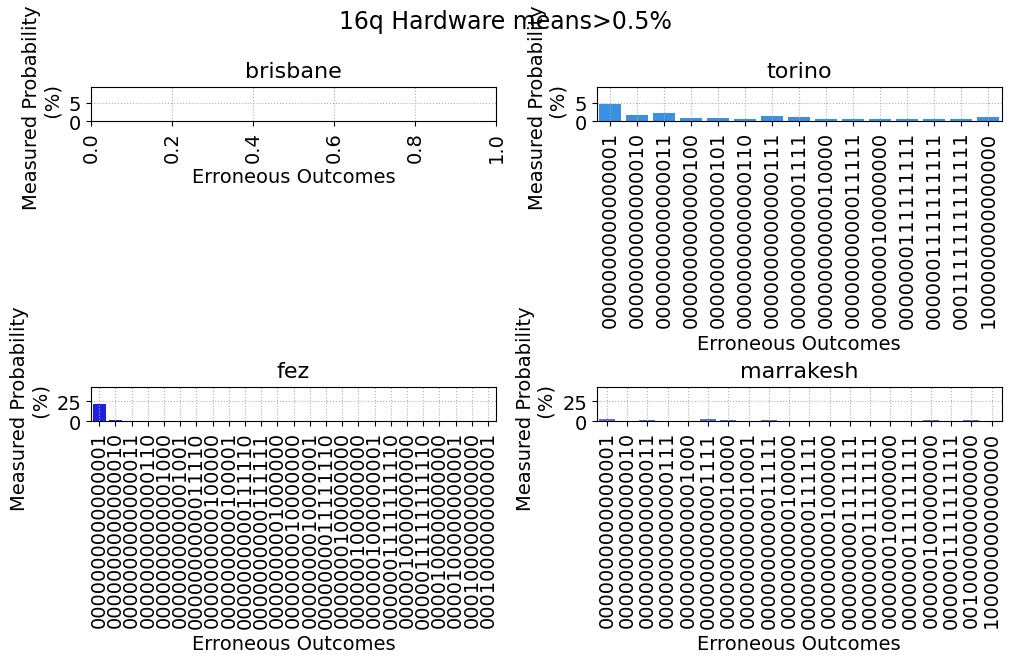

In [20]:
means_above_p5_16qH =[]
for mean in means_16qH:
    high_mean =mean[mean>=0.5]
    means_above_p5_16qH.append(high_mean)
    # print(high_mean)
plot_fingerprints(
    means_above_p5_16qH,
    "16q Hardware means>0.5%"
)

## Plots comparing exp type fect

### 4q

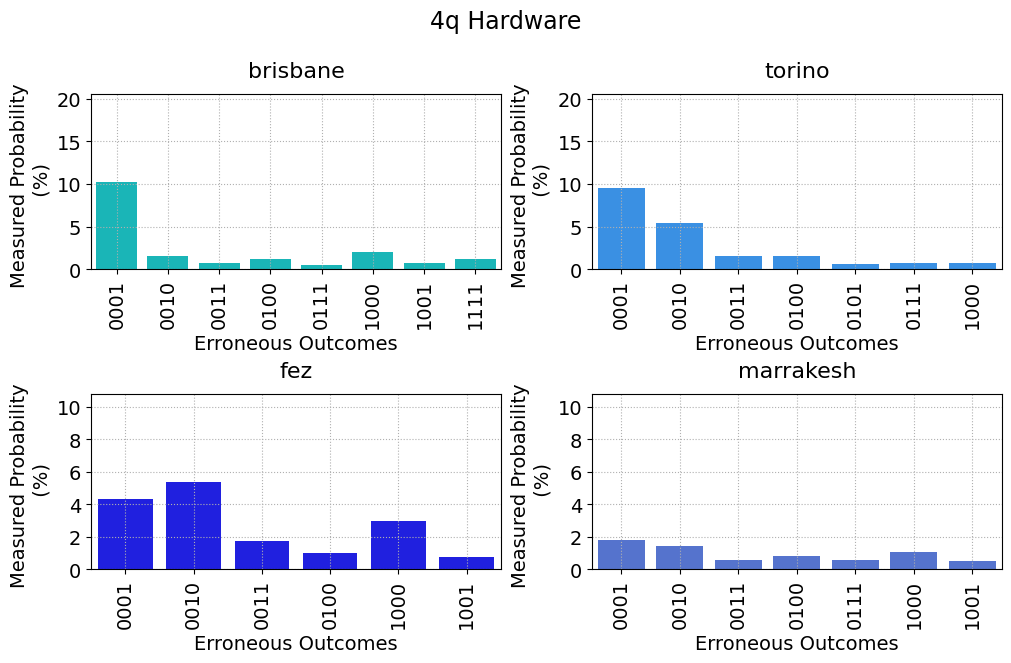

In [21]:
exp_type = 'Hardware'
n_qubits = 4
min_percent = 0.1
df_16q_H = dpf.get_expanded_df(
    exp_type,n_qubits,dir_ = '../',processed = False, updated_results=True)
means_16qH = get_err_mean_percents(df_16q_H,n_qubits)

plot_fingerprints(
    get_means_above(means_16qH,min_percent),
    str(n_qubits)+"q "+exp_type
)